<a href="https://colab.research.google.com/github/unica-ml/ml/blob/master/notebooks/ml07_clustering_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises on Data Clustering

Let's start by importing some utility functions.

In [80]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_dataset(x, y, feat_1=0, feat_2=1, color=None):
    n_classes = len(np.unique(y))
    colors = ['r', 'b', 'g', 'k', 'c', 'm', 'y']

    for y0 in range(n_classes):
        x0 = x[y == y0, feat_1]  # y0 is the selected class within the loop
        x1 = x[y == y0, feat_2]
        if color is None:
            plt.scatter(x0, x1, c=colors[y0], label='class ' + str(y0))
        else:
            plt.scatter(x0, x1, c=color, label='class ' + str(y0))
    plt.legend()
    plt.xlabel('feature x' + str(feat_1))
    plt.ylabel('feature x' + str(feat_2))

    return


def plot_decision_regions(x, y, classifier, resolution=0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'black', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    return

##Exercise 1

Cluster the bi-dimensional data points given below as $X$ using KMeans and single-linkage clustering.
Use the Euclidean distance to compute pairwise distances between samples, and initialize the centroids as given below for KMeans.

Clustering assignments:  [0 0 0 1 1 1]
Centroids: 
 [[0.66666667 0.66666667]
 [4.         1.        ]]


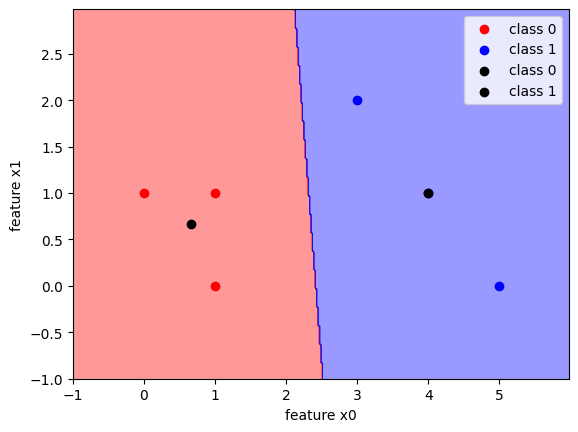

In [81]:
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [5, 0],
              [4, 1],
              [3, 2]])

centroids = np.array([[0.0, 0.0],[2.0, 1.0]])

kmeans = KMeans(n_clusters=2, n_init=1, init=centroids).fit(X)
print("Clustering assignments: ", kmeans.labels_)
print("Centroids: \n", kmeans.cluster_centers_)

plot_decision_regions(X, kmeans.labels_, kmeans)
plot_dataset(X, kmeans.labels_)
plot_dataset(kmeans.cluster_centers_, np.unique(kmeans.labels_), color='k')


Let's solve it step by step. First, we compute distances between samples in $X$ vs centroids in $\mu$.

In [82]:
print("Distance to centroid 0: ", np.linalg.norm(X-centroids[0,:],axis=1)**2)
print("Distance to centroid 1: ", np.linalg.norm(X-centroids[1,:],axis=1)**2)

Distance to centroid 0:  [ 2.  1.  1. 25. 17. 13.]
Distance to centroid 1:  [ 1.  2.  4. 10.  4.  2.]


So, we need to form two clusters as
$C_0 = \{\mathbf x_1, \mathbf x_2 \}$ and $C_1 = \{\mathbf x_0, \mathbf x_3 , \mathbf x_4, \mathbf x_5 \}$.

Let's recompute the centroids:

In [83]:
centroids[0,:] = np.mean(X[[1,2],:],axis=0)
centroids[1,:] = np.mean(X[[0,3,4,5],:],axis=0)
print("Updated centroids: \n", centroids)

Updated centroids: 
 [[0.5  0.5 ]
 [3.25 1.  ]]


We recompute distances to centroids, and re-update them:

In [84]:
print("Distance to centroid 0: ", np.round(np.linalg.norm(X-centroids[0,:],axis=1)**2, 2))
print("Distance to centroid 1: ", np.round(np.linalg.norm(X-centroids[1,:],axis=1)**2, 2))

Distance to centroid 0:  [ 0.5  0.5  0.5 20.5 12.5  8.5]
Distance to centroid 1:  [ 5.06  6.06 10.56  4.06  0.56  1.06]


The first point needs to be moved to the first centroid...

In [85]:
centroids[0,:] = np.mean(X[[0,1,2],:],axis=0)
centroids[1,:] = np.mean(X[[3,4,5],:],axis=0)
print("Updated centroids: \n", centroids)

Updated centroids: 
 [[0.66666667 0.66666667]
 [4.         1.        ]]


We verify now that the assignments do not change anymore, so convergence is reached.

In [86]:
print("Distance to centroid 0: ", np.round(np.linalg.norm(X-centroids[0,:],axis=1)**2, 2))
print("Distance to centroid 1: ", np.round(np.linalg.norm(X-centroids[1,:],axis=1)**2, 2))

Distance to centroid 0:  [ 0.22  0.56  0.56 19.22 11.22  7.22]
Distance to centroid 1:  [ 9. 10. 16.  2.  0.  2.]


We now solve the same clustering problem using single-linkage.

In [87]:
from sklearn.cluster import AgglomerativeClustering

metric="l2"
linkage="single"

cl = AgglomerativeClustering(
    n_clusters=2, metric=metric, linkage=linkage).fit(X)

print("Clustering assignments: ", cl.labels_)


Clustering assignments:  [1 1 1 0 0 0]


The result is the same as before. This code below plots the **dendrogram** for the single-linkage clustering.

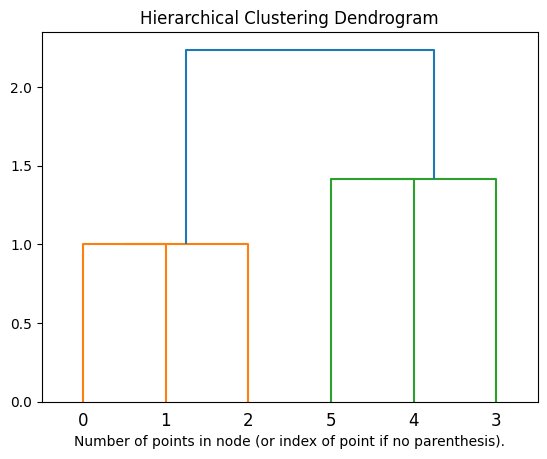

In [88]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None,
    metric=metric, linkage=linkage).fit(X)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


## Exercise 2

Consider the clustering partitions obtained by the KMeans algorithm, where the first three points are in the first cluster, and the last three ones in the second cluster. Evaluate the performance metrics:

$J_e = \sum_i \sum_k \| \mathbf x_i - \mathbf \mu_k \|^2$

$J_d = det(S_w)$, where $S_w = \sum_k (\mathbf x - \mathbf \mu_k)(\mathbf x - \mathbf \mu_k)^T$

Re-evaluate the same metrics after assigning the last point to the first cluster.





Clustering assignments:  [0 0 0 1 1 1]
Centroids: 
 [[0.66666667 0.66666667]
 [4.         1.        ]]
Je:  5.333333333333334
Sw: 
 [[ 2.66666667 -2.33333333]
 [-2.33333333  2.66666667]]
det(Sw):  1.6666666666666654


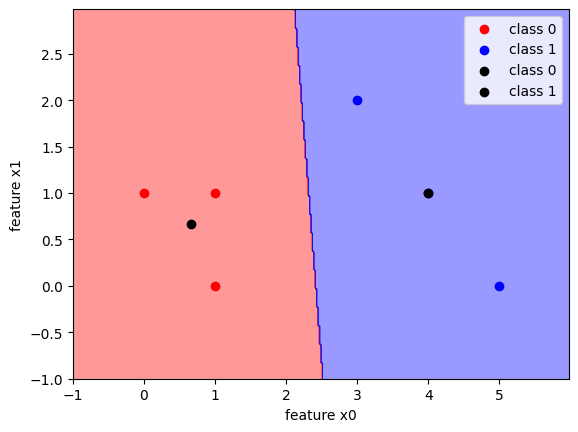

In [89]:
X = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [5, 0],
              [4, 1],
              [3, 2]])

centroids = np.array([[0, 0],[2, 2]])
kmeans = KMeans(n_clusters=2, n_init=1, init=centroids).fit(X)
print("Clustering assignments: ", kmeans.labels_)
print("Centroids: \n", kmeans.cluster_centers_)
plot_decision_regions(X, kmeans.labels_, kmeans)
plot_dataset(X, kmeans.labels_)
plot_dataset(kmeans.cluster_centers_, np.unique(kmeans.labels_), color='k')

# evaluate metrics
Je = 0
Sw = np.zeros(shape=(X.shape[1], X.shape[1]))
for k in range(kmeans.cluster_centers_.shape[0]):
    v = X[kmeans.labels_==k,:]-kmeans.cluster_centers_[k,:]
    Je += np.linalg.norm(v)**2
    Sw += v.T.dot(v)

print("Je: ", Je)
print("Sw: \n", Sw)
print("det(Sw): ", np.linalg.det(Sw))

Clustering assignments:  [1 1 1 0 0 1]
Centroids: 
 [[4.5  0.5 ]
 [1.25 1.  ]]
Je:  7.75
Sw: 
 [[5.25 1.5 ]
 [1.5  2.5 ]]
det(Sw):  10.875000000000002


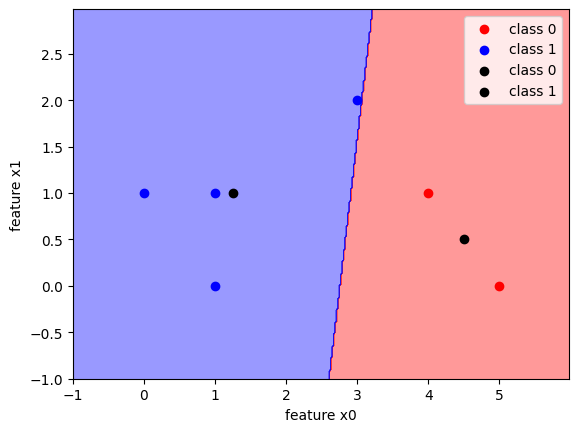

In [90]:
# Re-run when x6 is shifted to the first cluster (we change init centroids):

centroids = np.array([[0, 0],[1, 1]])
kmeans = KMeans(n_clusters=2, n_init=1, init=centroids).fit(X)
print("Clustering assignments: ", kmeans.labels_)
print("Centroids: \n", kmeans.cluster_centers_)
plot_decision_regions(X, kmeans.labels_, kmeans)
plot_dataset(X, kmeans.labels_)
plot_dataset(kmeans.cluster_centers_, np.unique(kmeans.labels_), color='k')

# evaluate metrics
Je = 0
Sw = np.zeros(shape=(X.shape[1], X.shape[1]))
for k in range(kmeans.cluster_centers_.shape[0]):
    v = X[kmeans.labels_==k,:]-kmeans.cluster_centers_[k,:]
    Je += np.linalg.norm(v)**2
    Sw += v.T.dot(v)

print("Je: ", Je)
print("Sw: \n", Sw)
print("det(Sw): ", np.linalg.det(Sw))

The criterion functions show consistent results, indicating that the first division is better.